## An Incremental Algorithm for Signal Reconstruction from Short-Time Fourier Transform Magnitude
### Usage Example
The algorithm is very badly optimized therefore is very slow and useful for scientific purpose only

In [1]:
from sigrecon import *
from matplotlib import pylab as plt

Working parameters of the algorithm you can play with

In [38]:
n_fft = 512
hop_length = 64
win_length = 256
err_tol = 1e-02

Db level is for spectrogram image only, don't impact on the computations

In [39]:
min_level_db = -40
ref_level_db = 30

We set some positivity shift, it's crucial for success

In [40]:
sound, sample_rate = load_wav('sound.wav')
s = sound[:18000] / 2 - np.min(sound / 16)
S = np.abs(stft(s, n_fft=n_fft, hop_length=hop_length, win_length=win_length))

Plotting spectrogram in normalized Db scale

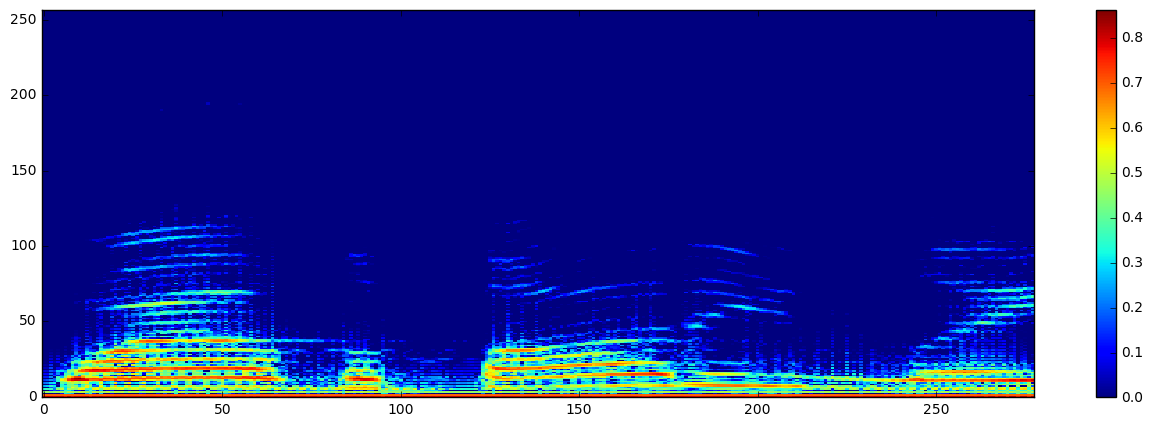

In [41]:
%matplotlib inline
S_db = normalize(amp_to_db(S) - ref_level_db, min_level_db)
plt.figure(figsize=(16,5))
plt.imshow(S_db, aspect='auto', origin='lower', interpolation='none')
plt.colorbar()

Reconstruct the signal and save it

In [44]:
%%time
y = signal_reconstruction(S, n_fft, hop_length, win_length, err_tol)
save_wav(y, 'isr.wav', sample_rate)

CPU times: user 1min 1s, sys: 1.05 s, total: 1min 2s
Wall time: 15.6 s
